In [1]:
from google.colab import files
import glob

arquivo = files.upload()
!unzip 'Enron.zip' -d 'enron'

Streaming output truncated to the last 5000 lines.
  inflating: enron/3163.2000-12-21.farmer.ham.txt  
  inflating: enron/4974.2001-10-12.farmer.ham.txt  
  inflating: enron/2492.2000-10-10.farmer.ham.txt  
  inflating: enron/1150.2000-05-26.farmer.ham.txt  
  inflating: enron/2283.2004-09-25.GP.spam.txt  
  inflating: enron/5141.2002-01-02.farmer.ham.txt  
  inflating: enron/4706.2001-06-27.farmer.ham.txt  
  inflating: enron/5115.2005-09-01.GP.spam.txt  
  inflating: enron/4925.2001-09-21.farmer.ham.txt  
  inflating: enron/4402.2001-04-26.farmer.ham.txt  
  inflating: enron/4612.2005-06-01.GP.spam.txt  
  inflating: enron/4946.2001-09-28.farmer.ham.txt  
  inflating: enron/3381.2001-01-19.farmer.ham.txt  
  inflating: enron/4821.2001-08-14.farmer.ham.txt  
  inflating: enron/1076.2004-05-08.GP.spam.txt  
  inflating: enron/1065.2000-05-11.farmer.ham.txt  
  inflating: enron/4295.2001-04-17.farmer.ham.txt  
  inflating: enron/4429.2001-04-27.farmer.ham.txt  
  inflating: enron/0002.1

In [2]:
from collections import Counter
import itertools
import nltk
nltk.download('stopwords')
stops = nltk.corpus.stopwords.words('english')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')


def tokenizar(str_texto):
    return word_tokenize(str_texto)

def limpar(lista):
    return [i.lower() for i in lista if i.isalpha()]

def sem_stops(lista):
    return [i for i in lista if i not in stops]

def stemizar(lista):
    return [stemmer.stem(i) for i in lista]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
arqs = glob.glob('enron/*.txt')
mensagens = list()
etiquetas = list()
for arq in arqs:
    arquivo = open(arq, 'r')
    classe = int(arquivo.readline()[0])  # Pega só o número e deixa de fora o \n
    
    texto = arquivo.read()
    texto = stemizar(sem_stops(limpar(tokenizar(texto))))
    mensagens.append(texto)
    etiquetas.append(classe)
    arquivo.close()

In [4]:
# Conferindo...
etiquetas[:10]

[1, 0, 0, 1, 0, 0, 0, 1, 1, 1]

# Codificação (encoding)

In [5]:
# Codificação

import numpy as np

vocab = set([p for sent in mensagens for p in sent])

# Cria um dicionário {palavra: índice}
indices_de_palavras = {palavra: e+1 for e, palavra in enumerate(vocab)}  # e+1 para que o primeiro índice não seja 0, que é um pad

# Gera um vetor de índices de palavras para cada mensagem
vetores_msg = np.array([[indices_de_palavras[p] for p in d] for d in mensagens], dtype=object)
vetores_msg

array([list([18199, 35785, 31264, 14186, 13512, 29996, 23200, 17521, 4527, 14186, 7148, 6497, 17297, 10799, 373, 2674, 31525, 27597, 36345, 10799, 373, 561, 16, 17513, 23737, 13630]),
       list([18199, 17963, 16642, 1508, 24495, 16336, 31235, 911, 6147, 14293, 30175, 10694, 20314, 36428, 9848, 16568, 30175, 36066, 20314, 37871, 28145, 17963, 16642, 1508, 24495, 1330, 16743, 34435, 9022, 20136, 10694, 33527, 27058, 6634, 26093, 12822, 12822, 5782, 1373, 27193, 26093, 12822, 12822, 13432, 18126, 26093, 12822, 12822, 6464, 26285, 26093, 12822, 31323, 20894, 26093, 12822, 12822, 18199, 17963, 16642, 1508, 24495, 16336, 31235, 911, 6147, 14293, 30175, 27058, 26756, 37002, 30175, 1330, 12903, 20314, 10694, 13515, 10694, 33527, 26093, 12822, 16743, 34435, 9022, 20136, 10694, 33527, 22317, 1373, 27193, 26093, 12822, 12822, 5782, 32468, 15378, 20136, 16743, 16743, 6464, 26285, 26093, 12822, 31323, 20894, 26093, 12822, 12822, 18199, 17963, 16642, 1508, 24495, 16336, 31235, 911, 6147, 14293, 30

In [6]:
# Conferindo...
print(len(vocab))
indices_de_palavras['viagra']

37892


21054

In [7]:
# Codificação binária

def binarizar(matriz_int, dim=len(vocab)+1):  # len(vocab)+1 porque subimos o índice do primeiro item de vocab para 1
    binarizado = np.zeros((len(matriz_int), dim))

    for e, vetor in enumerate(matriz_int):
        binarizado[e, vetor] = 1.

    return binarizado

# Conversão em binários dos testos das resenhas (variável X)
vetores_msg_bin = binarizar(vetores_msg)

In [8]:
# Conferindo...
print(vetores_msg_bin.shape)
vetores_msg_bin[0]

(5157, 37893)


array([0., 0., 0., ..., 0., 0., 0.])

In [9]:
# Binarização das etiquetas de classificação. Variável Y.

etiquetas_bin = np.asarray(etiquetas).astype('float32')

In [10]:
# Conferindo...
etiquetas_bin[:10] 

array([1., 0., 0., 1., 0., 0., 0., 1., 1., 1.], dtype=float32)

In [11]:
# Partição treinamento / teste
treino_x = vetores_msg_bin[:round(len(mensagens) * 0.8)]
teste_x = vetores_msg_bin[len(treino_x) + 1:]

treino_y = etiquetas_bin[:round(len(mensagens) * 0.8)]
teste_y = etiquetas_bin[len(treino_y) + 1:]

In [12]:
len(treino_x)

4126

# Criação do modelo de rede

Partição dos dados de treinamento em (1) validação e (2) treinamento parcial, tanto X (resenhas) quanto Y (etiquetas).

In [13]:
valid_x = treino_x[:2000]
treino_x_parcial = treino_x[2000:]
valid_y = treino_y[:2000] 
treino_y_parcial = treino_y[2000:]

Importação dos módulos e definição da arquitetura da rede.

In [23]:
from keras import models 
from keras import layers

modelo = models.Sequential() 
modelo.add(layers.Dense(16, activation='relu', input_shape=(len(vocab)+1,)))
modelo.add(layers.Dense(16, activation='relu'))
modelo.add(layers.Dense(1, activation='sigmoid'))

Compilação do modelo.

In [24]:
# A função de perda escolhida é a entropia cruzada, boa para classificação probabilística,
# e binária, pois temos duas classes possíveis para as etiquetas das resenhas (pos. e neg.)
# O otimizador é o Adam, sempre uma boa escolha para PLN.
# O desempenho será avaliado pela acurácia ("acc").

modelo.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['acc'])

Treinamento do modelo compilado.

In [25]:
historia = modelo.fit(treino_x_parcial, 
                    treino_y_parcial, 
                    epochs=30, 
                    batch_size=512, 
                    validation_data=(valid_x, valid_y), 
                    verbose=0  # já que será gerado um gráfico, não é tão importante ver os números do aprendizado
                    )

Exibição da evolução da perda no treinamento e na validação.

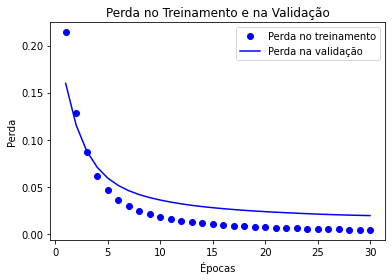

In [26]:
import matplotlib.pyplot as plt

dic_historia = historia.history  # dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])
perda = dic_historia['loss'] 
perda_valid = dic_historia['val_loss']

acuracia = dic_historia['acc']
epocas = range(1, len(acuracia) + 1)

plt.plot(epocas, perda, 'bo', label='Perda no treinamento')  # “bo” = pontilhado azul
plt.plot(epocas, perda_valid, 'b', label='Perda na validação')  # “b” = linha contínua azul
plt.title('Perda no Treinamento e na Validação') 
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

plt.show()

Exibição da evolução da acurácia no teste e na validação.

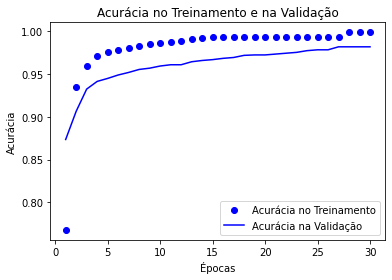

In [27]:
plt.clf()  # Limpa a figura

acuracia_treino = dic_historia['acc'] 
acuracia_valid = dic_historia['val_acc']

plt.plot(epocas, acuracia_treino, 'bo', label='Acurácia no Treinamento') 
plt.plot(epocas, acuracia_valid, 'b', label='Acurácia na Validação')
plt.title('Acurácia no Treinamento e na Validação') 
plt.xlabel('Épocas') 
plt.ylabel('Acurácia') 
plt.legend()

plt.show()

Ao final, vamos usar os conjuntos de testes para avaliar os resultados.

# Treinamento com `EarlyStopping`

O modelo será treinado novamente com um número grande de épocas, em busca de obter seu melhor desempenho e parar quando encontrá-lo "automaticamente", isto é, quando parar de ter melhoria no aprendizado.


In [28]:
from tensorflow.keras import callbacks

aprendeu_parou = callbacks.EarlyStopping(
    min_delta=0.001,  # aprendizado mínimo (resultados menores não contarão como aprendizado)
    patience=10,  # por quantas épocas insistir?
    restore_best_weights=True,
)

historia = modelo.fit(treino_x_parcial, 
                    treino_y_parcial, 
                    epochs=300, 
                    batch_size=512, 
                    validation_data=(valid_x, valid_y),
                    callbacks=[aprendeu_parou])

Epoch 1/300
5/5 [==============================] - 1s 206ms/step - loss: 0.0040 - acc: 0.9995 - val_loss: 0.0190 - val_acc: 0.9825
Epoch 2/300
5/5 [==============================] - 1s 125ms/step - loss: 0.0038 - acc: 0.9995 - val_loss: 0.0188 - val_acc: 0.9825
Epoch 3/300
5/5 [==============================] - 1s 124ms/step - loss: 0.0036 - acc: 0.9995 - val_loss: 0.0186 - val_acc: 0.9820
Epoch 4/300
5/5 [==============================] - 1s 127ms/step - loss: 0.0035 - acc: 0.9995 - val_loss: 0.0183 - val_acc: 0.9820
Epoch 5/300
5/5 [==============================] - 1s 125ms/step - loss: 0.0033 - acc: 0.9995 - val_loss: 0.0181 - val_acc: 0.9820
Epoch 6/300
5/5 [==============================] - 1s 130ms/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.0179 - val_acc: 0.9825
Epoch 7/300
5/5 [==============================] - 1s 127ms/step - loss: 0.0031 - acc: 1.0000 - val_loss: 0.0176 - val_acc: 0.9840
Epoch 8/300
5/5 [==============================] - 1s 128ms/step - loss: 0.0030 - a

Hora da verdade: avaliação contra o conjunto de testes.

In [29]:
avaliacao = modelo.evaluate(teste_x, teste_y)

33/33 [==============================] - 0s 4ms/step - loss: 0.0169 - acc: 0.9816


In [30]:
print('Acurácia na avaliação: ', avaliacao[1], '\nPerda: ', avaliacao[0])

Acurácia na avaliação:  0.9815533757209778 
Perda:  0.016856912523508072
